# Calcul/Analyse préconception système vanne

Le thème d'etude est la vanne de prise d'air d'un avion de ligne.
Nous souhaitons motoriser ce système à l'aide d'un actionneur linéaire à l'aide d'un vérin électrique.Voir si dessous:


Image

Nous devons donc:
- Choisir une architecture pour le dispositif de commande 
- Choisir un actionneur 
- Faire la maquette numérique de notre conception

Mais avant toute chose nous devons faire une analyse de préconception en:
- Calculant le degré d'hyperstatisme de ce mécanisme
- Ecrivant les deux équations scalaires issues de la fermeture géometrique du système et en déterminer la loi entrée/sortie de ce mécanisme 
- Estimant l'effort aérodynamique de la pièce 2, en position fermée

## Shéma cinématique:


Image




## Hyperstatisme:

### degrée mobilité:

In [1]:
import math
from sympy import Symbol, Eq, solve
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" Mécanisme Plan """

Np = 4                          # nb de pièce avec bati
NL1 = 4                        # nb de liaisons à 1 degré de liberté
NL2 = 0                        # nb de liaisons à 1 degré de liberté

mu = 3*(Np-1)-2*NL1-2*NL2

print(f"Le degrée de mobilité du mécanisme plan est de {mu}")

Le degrée de mobilité du mécanisme plan est de 1


### degrée d'hyperstatisme:

In [3]:
Es = 6*(Np-1)
S = 4*5
me = Es-S
h = mu-me

print(f"Le degrée d'hyperstatisme du mécanisme plan est de {h}")

Le degrée d'hyperstatisme du mécanisme plan est de 3


## Loi entrée/sortie 
Voici le shéma qui represente les angle et blablabla:


Image


Nous cherchons donc à déterminé theta_4 par rapport à theta_2

### Equation scalaire de fermeture:

vect_OA + vect_AB + vect_BC + vect_CO = vect_nul

ce qui implique:

vect_OC = vect_OA + vect_AB + vect_BC

### Projection en x et y:

In [4]:
l2 = 62.5
l3 = 378
l4 = 20
xc = 442
yc = 61

e = 60
c2 = 31.67
c3 = 202.82
P2 = 347
P3 = 6330

In [5]:
def calcul_theta4(theta_2):
    
    X = xc-l2*np.cos(theta_2)
    Y = yc-l2*np.sin(theta_2)

    A = X**2+2*X*l4+Y**2+l4**2-l3**2
    B = -4*Y*l4
    C = X**2-2*X*l4+Y**2+l4**2-l3**2

    delta = B**2-4*A*C

    t1 = (-B+np.sqrt(delta))/(2*A) 
    #t2 = (-B-np.sqrt(delta))/(2*A) 

    # Calculer les valeurs correspondantes de la fonction sinus
    theta_4_1 = np.degrees(2*np.arctan(t1))
    #theta_4_2 = np.degrees(2*np.arctan(t2))
    
    return theta_4_1 

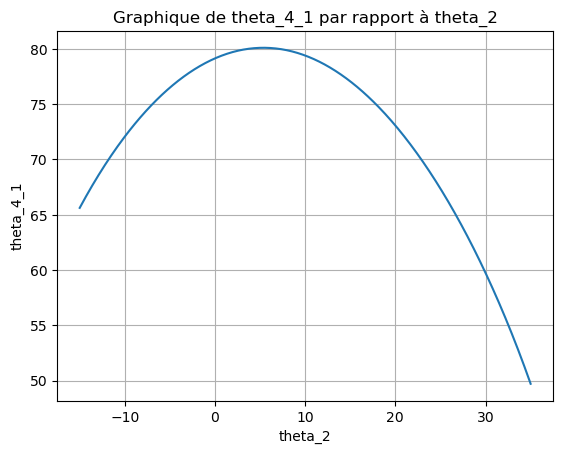

In [6]:
theta_2 = np.radians(np.linspace(-15,35,500))

calcul_theta4(theta_2)

# Tracer le graphique
plt.plot(np.degrees(theta_2), calcul_theta4(theta_2))
plt.title('Graphique de theta_4_1 par rapport à theta_2')
plt.xlabel('theta_2')
plt.ylabel('theta_4_1')
plt.grid(True)
plt.show()

### Détermination de FE et R4

[3191.1783419679396, 3255.0055087382552, 3312.0496165138925, 3363.074340700579, 3408.73905481348, 3449.6201373217937, 3486.227528134342, 3519.017752714396, 3548.4042831328, 3574.7658660431157, 3598.4532807842666, 3619.7948730285616, 3639.1011252406265, 3656.668464511249, 3672.7824642202154, 3687.720563773188, 3701.7544071048937, 3715.151883471615, 3728.178941669959, 3741.10124008619, 3754.185689111554, 3767.7019389186858, 3781.9238640487697, 3797.1310965396983, 3813.6106614229357, 3831.6587724675132, 3851.58285236849, 3873.7038506739514, 3898.3589453909894, 3925.9047315227026, 3956.7210233601318, 3991.2154294655693, 4029.828903219027, 4073.042532331945, 4121.385914903976, 4175.447587957131, 4235.888143004196, 4303.456907061226, 4379.0134261843805, 4463.555526302842, 4558.256549590799, 4664.51565638902, 4784.027164577186, 4918.878357917666, 5071.691148354179, 5245.83364285069]


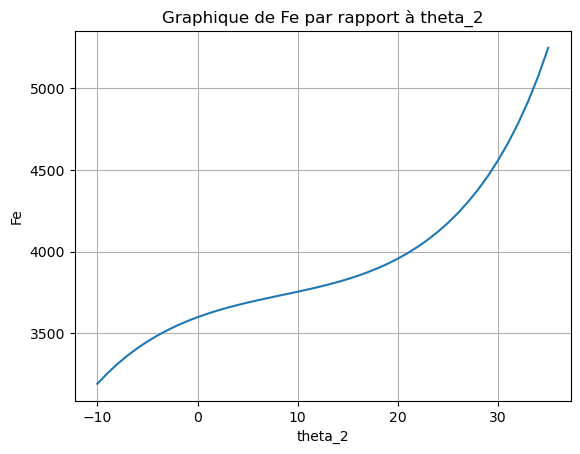

In [9]:
th_2_list = []
Fe_list = []
for i in range(-10,36):
    
    
    
    def theta4(theta_2):
        theta_2 = np.radians(theta_2)
        l2 = 62.5
        l3 = 378
        l4 = 20
        xc = 442
        yc = 61
    
        X = xc-l2*np.cos(theta_2)
        Y = yc-l2*np.sin(theta_2)
    
        A = X**2+2*X*l4+Y**2+l4**2-l3**2
        B = -4*Y*l4
        C = X**2-2*X*l4+Y**2+l4**2-l3**2
    
        delta = B**2-4*A*C
    
        t1 = (-B+np.sqrt(delta))/(2*A) 
    
        return np.degrees(2*np.arctan(t1))
    
    theta_2 = i
    theta_4 = np.radians(theta4(theta_2))
    theta_2 = np.radians(theta_2)
    
    l2 = 62.5
    l3 = 378
    l4 = 20
    xc = 442
    yc = 61

    e = 60
    c2 = 31.67
    c3 = 202.82
    P2 = 347
    P3 = 6330

    X = xc-l2*np.cos(theta_2)

    theta_3 = np.arccos((X-l4*np.cos(theta_4))/l3)
    alpha_3 = np.radians(4.4)
    beta = np.radians(0)

    m11 = e*(np.cos(theta_3-alpha_3)*np.cos(beta) + np.sin(theta_3-alpha_3)*np.sin(beta))
    m12 = l3*(np.cos(theta_3)*np.sin(theta_4)-np.sin(theta_3)*np.cos(theta_4))

    m21 = (l2*np.cos(theta_2)+e*np.cos(theta_3-alpha_3))*np.cos(beta)+ (l2*np.sin(theta_2)+e*np.sin(theta_3-alpha_3))*np.sin(beta)
    m22 = (l2*np.cos(theta_2)+l3*np.cos(theta_3))*np.sin(theta_4)-(l2*np.sin(theta_2)+l3*np.sin(theta_3))*np.cos(theta_4)

    v1 = -c3*P3
    v2 = -c2*P2-P3*np.cos(theta_3-alpha_3)*(l2*np.cos(theta_2)+c3*np.cos(theta_3-alpha_3))-P3*np.sin(theta_3-alpha_3)*(l2*np.sin(theta_2)+c3*np.sin(theta_3-alpha_3))


    # Définir la matrice et le vecteur
    A = np.array([[m11, m12], [m21, m22]])
    B = np.array([v1, v2])

    # Résoudre le système d'équations linéaires
    solution = np.linalg.solve(A, B)

    # Afficher la solution
    Fe, R4 = solution
    
    th_2_list.append(i) 
    Fe_list.append(Fe)

liste_positif = [-x for x in Fe_list]    
    
print(liste_positif)    
    
# Tracer le graphique
plt.plot(th_2_list,  liste_positif)
plt.title('Graphique de Fe par rapport à theta_2')
plt.xlabel('theta_2')
plt.ylabel('Fe')
plt.grid(True)
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt

#def calcul_theta4(theta_2):
    
     #return np.radians(2 * np.arctan(t1))

def calcul_matrie_vecteur(theta_2, theta_4):
    
    X = xc-l2*np.cos(theta_2)
    
    theta_3 = np.arccos((X-l4*np.cos(theta_4))/l3)
    alpha_3 = np.radians(4.4)
    beta = np.radians(0)

    m11 = e*(np.cos(theta_3-alpha_3)*np.cos(beta) + np.sin(theta_3-alpha_3)*np.sin(beta))
    m12 = l3*(np.cos(theta_3)*np.sin(theta_4)-np.sin(theta_3)*np.cos(theta_4))

    m21 = (l2*np.cos(theta_2)+e*np.cos(theta_3-alpha_3))*np.cos(beta)+ (l2*np.sin(theta_2)+e*np.sin(theta_3-alpha_3))*np.sin(beta)
    m22 = (l2*np.cos(theta_2)+l3*np.cos(theta_3))*np.sin(theta_4)-(l2*np.sin(theta_2)+l3*np.sin(theta_3))*np.cos(theta_4)

    v1 = -c3*P3
    v2 = -c2*P2-P3*np.cos(theta_3-alpha_3)*(l2*np.cos(theta_2)+c3*np.cos(theta_3-alpha_3))-P3*np.sin(theta_3-alpha_3)*(l2*np.sin(theta_2)+c3*np.sin(theta_3-alpha_3))


    # Définir la matrice et le vecteur
    A = np.array([[m11, m12], [m21, m22]])
    B = np.array([v1, v2])
    
    return A, B

def resoudre_systeme(A, B):
    
    return np.linalg.solve(A, B)

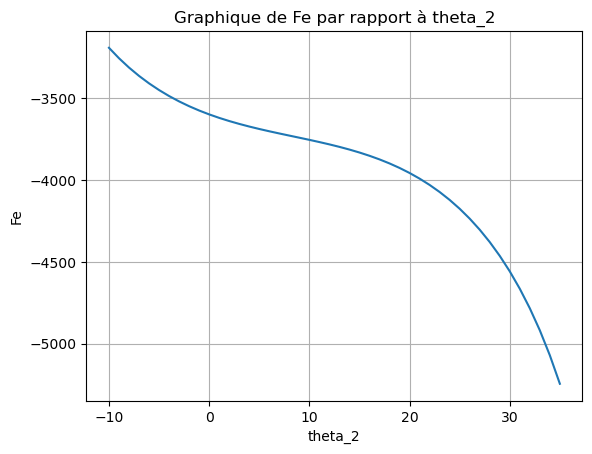

In [17]:
# Initialiser les listes
th_2_list = []
Fe_list = []

# Boucle principale
for i in range(-10, 36):
    theta_2 = np.radians(i)
    theta_4 = np.radians(calcul_theta4(theta_2))
    
    A, B = calcul_matrie_vecteur(theta_2, theta_4)
    
    solution = resoudre_systeme(A, B)
    Fe, R4 = solution
    
    th_2_list.append(i) 
    Fe_list.append(Fe)  # Assurez-vous que Fe est positif ou nul

# Tracer le graphique
plt.plot(th_2_list, Fe_list)
plt.title('Graphique de Fe par rapport à theta_2')
plt.xlabel('theta_2')
plt.ylabel('Fe')
plt.grid(True)
plt.show()